## Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


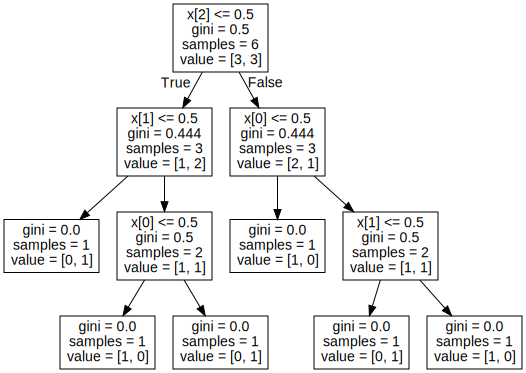

In [6]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [9]:
# Generate a random permutation of the indices of examples that will be later used
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [10]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [11]:
# apply fitted model "clf" to the test set
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test)
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [12]:
# print the corresponding instances indexes and class names
for i in range(len(iris_y_test)):
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [13]:
for i in range(len(iris_y_test)):
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

Usa Pandas per visualizzare gli stessi dati in modo più compatto

In [14]:
import pandas as pd
results_data = []

for i in range(len(iris_y_test)):
    feature_values = [iris_X_test[i][j] for j in range(len(iris.feature_names))]

    results_data.append({
        'Instance #': indices_test[i],
        iris.feature_names[0]: feature_values[0],
        iris.feature_names[1]: feature_values[1],
        iris.feature_names[2]: feature_values[2],
        iris.feature_names[3]: feature_values[3],
        'Predicted': iris.target_names[predicted_y_test[i]],
        'True Class': iris.target_names[iris_y_test[i]],
        'Correct': 'Yes' if predicted_y_test[i] == iris_y_test[i] else 'No'
    })

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False, float_format='%.1f'))

 Instance #  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  Predicted True Class Correct
         88                5.6               3.0                4.1               1.3 versicolor versicolor     Yes
         70                5.9               3.2                4.8               1.8  virginica versicolor      No
         87                6.3               2.3                4.4               1.3 versicolor versicolor     Yes
         36                5.5               3.5                1.3               0.2     setosa     setosa     Yes
         21                5.1               3.7                1.5               0.4     setosa     setosa     Yes
          9                4.9               3.1                1.5               0.1     setosa     setosa     Yes
        103                6.3               2.9                5.6               1.8  virginica  virginica     Yes
         67                5.8               2.7                4.1     

# Obtain model performance results

In [15]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [17]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree

## 1. Print the picture in a PDF file

In [18]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [19]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


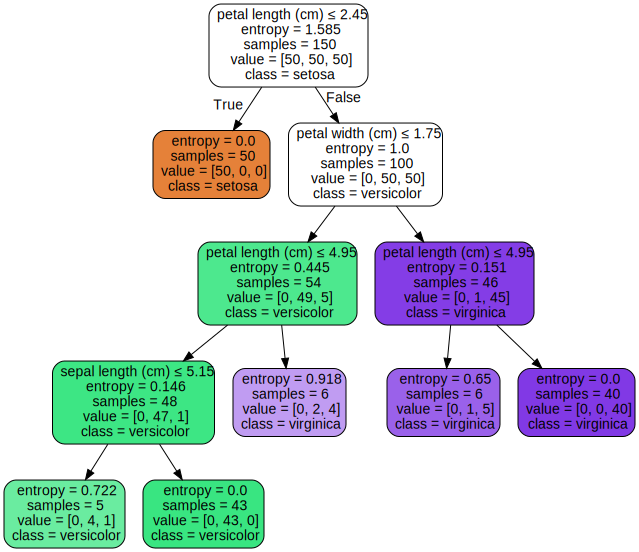

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. build and show the confusion matrix obtained by cross validation, where the errors are on the test sets.
2. build the ROC curve (or coverage curve in coverage space) and plot it for the tree: you have to build three curves, one for each class, considered in turn as the positive class.
3. get an artificial inflation of the Virginica class in the training set by a given factor: 10 (weigh more the class virginica which is difficult to discriminate with versicolor). Learn the tree in this condition. In this case we have more examples in the dataset!

**Note:** Be careful in the random sampling when you divide the dataset into training- and test-set: no examples of the training-set should go in the test- set.

4. As an alternative to step 3, modify instead the weight of the Virginica class (set to 10 the weight for misclassification of Virginica) and learn the tree in this condition. You should obtain similar results as for step 3.

**Note:** Be careful to the values of the iperparameters you use if you want to obtain the same results as with the step 3 (such as min_samples_split, min_samples_leaf, max_leaf_nodes): they should be set in a value that is proportionated to the number of examples in the training-set.

5. learn the tree but try to avoid overfitting (by improving the error on the test set). You can do tuning of the hyper-parameters using the function [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
Consider the following iperprameters:
* criterion{“gini”, “entropy”, “log_loss”}
* splitter{“best”, “random”}
* max_depth
* min_samples_split
* min_samples_leaf
* max_features
* max_leaf_nodes
* min_impurity_decrease
* ccp_alpha

Decide yourself the suitable possible values for each of them.



# My solutions

## 1. build and show the confusion matrix obtained by cross validation, where the errors are on the test sets.

Confusion Matrix (Cross Validation):
 [[50  0  0]
 [ 0 44  6]
 [ 0  3 47]]


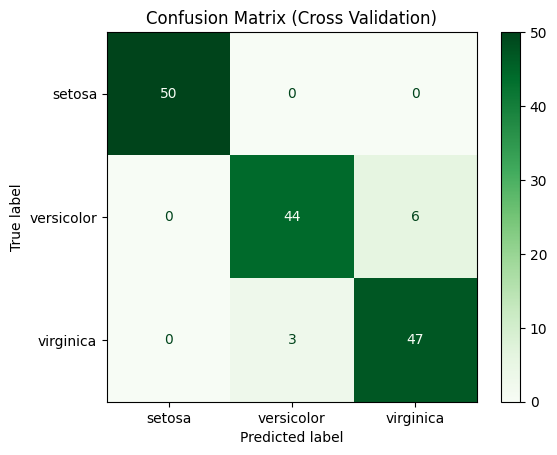

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the classifier defined in the notebook
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})

# Obtain predictions by cross-validation (cv=5)
y_pred_cv = cross_val_predict(clf, iris.data, iris.target, cv=5)

# Generate confusion matrix
cm = confusion_matrix(iris.target, y_pred_cv)
print("Confusion Matrix (Cross Validation):\n", cm)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix (Cross Validation)")
plt.show()

## 2. build the ROC curve (or coverage curve in coverage space) and plot it for the tree: you have to build three curves, one for each class, considered in turn as the positive class.

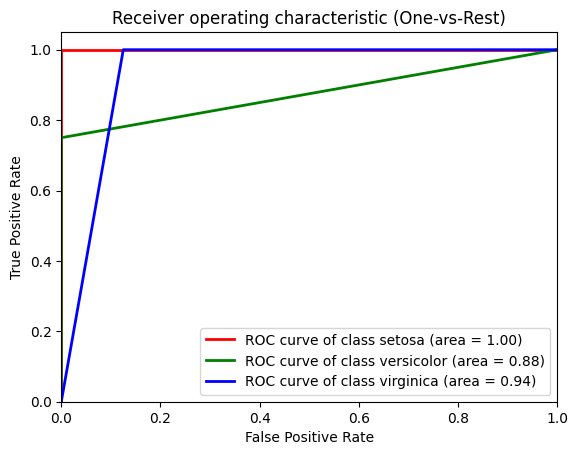

In [44]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Fit the classifier on the training data
clf.fit(iris_X_train, iris_y_train)

# Binarize the test labels
y_test_bin = label_binarize(iris_y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get probability estimates for the test set
y_score = clf.predict_proba(iris_X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure()
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(iris.target_names[i], roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

## 3. get an artificial inflation of the Virginica class in the training set by a given factor: 10 (weigh more the class virginica which is difficult to discriminate with versicolor). Learn the tree in this condition. In this case we have more examples in the dataset!

**Note:** Be careful in the random sampling when you divide the dataset into training- and test-set: no examples of the training-set should go in the test- set.

Original training size: 140
Inflated training size: 572

Predictions with inflated dataset:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]


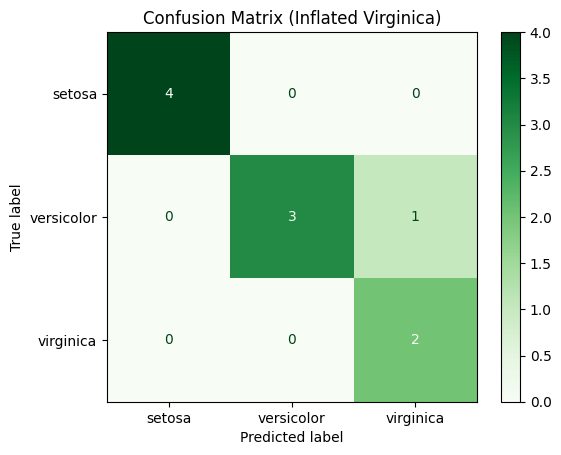

In [ ]:
import numpy as np

# 1. Identify indices of Virginica (class 2) in the training set
virginica_indices = np.where(iris_y_train == 2)[0]

# 2. Get the Virginica samples
X_virginica = iris_X_train[virginica_indices]
y_virginica = iris_y_train[virginica_indices]

# 3. Inflate: Repeat Virginica samples 9 more times (total 10x)
# We concatenate the original training set with 9 copies of the Virginica samples
X_inflated = np.repeat([iris_X_train] + [X_virginica] * 9, axis=0)
y_inflated = np.concatenate([iris_y_train] + [y_virginica] * 9, axis=0)

print(f"Original training size: {len(iris_X_train)}")
print(f"Inflated training size: {len(X_inflated)}")

# 4. Train the tree on the inflated dataset
# Note: We use the same hyperparameters as before to see the effect of inflation
clf_inflated = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf_inflated.fit(X_inflated, y_inflated)

# 5. Evaluate
predicted_y_test_inflated = clf_inflated.predict(iris_X_test)
print("\nPredictions with inflated dataset:")
print(predicted_y_test_inflated)
print("True classes:")
print(iris_y_test)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(iris_y_test, predicted_y_test_inflated, display_labels=iris.target_names, cmap=plt.cm.Greens)
plt.title("Confusion Matrix (Inflated Virginica)")
plt.show()

## 4. As an alternative to step 3, modify instead the weight of the Virginica class (set to 10 the weight for misclassification of Virginica) and learn the tree in this condition. You should obtain similar results as for step 3.

**Note:** Be careful to the values of the iperparameters you use if you want to obtain the same results as with the step 3 (such as min_samples_split, min_samples_leaf, max_leaf_nodes): they should be set in a value that is proportionated to the number of examples in the training-set.

Predictions with weighted class:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]


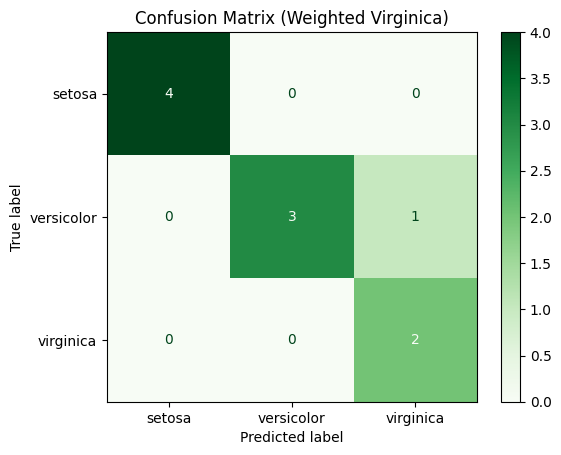

In [50]:
# Modify weight of Virginica to 10
# We use the original training set, but tell the classifier to treat class 2 (Virginica) as 10x more important
clf_weighted = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1, 1:1, 2:10})
clf_weighted.fit(iris_X_train, iris_y_train)

# Evaluate
predicted_y_test_weighted = clf_weighted.predict(iris_X_test)
print("Predictions with weighted class:")
print(predicted_y_test_weighted)
print("True classes:")
print(iris_y_test)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(iris_y_test, predicted_y_test_weighted, display_labels=iris.target_names, cmap=plt.cm.Greens)
plt.title("Confusion Matrix (Weighted Virginica)")
plt.show()

## 5. learn the tree but try to avoid overfitting (by improving the error on the test set). You can do tuning of the hyper-parameters using the function [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
Consider the following iperprameters:
* criterion{“gini”, “entropy”, “log_loss”}
* splitter{“best”, “random”}
* max_depth
* min_samples_split
* min_samples_leaf
* max_features
* max_leaf_nodes
* min_impurity_decrease
* ccp_alpha

In [36]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    # 'max_leaf_nodes': [None, 5, 10, 20], 
    # 'min_impurity_decrease': [0.0, 0.01, 0.1],
    # 'ccp_alpha': [0.0, 0.01, 0.1]
}

# Initialize classifier
dt = tree.DecisionTreeClassifier(random_state=300)

# Grid Search
# We use the training set for tuning. GridSearchCV performs cross-validation internally.
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(iris_X_train, iris_y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best CV score: {grid_search.best_score_:.3f}")

# Evaluate best model on test set
best_clf = grid_search.best_estimator_
predicted_y_test_best = best_clf.predict(iris_X_test)
print("Test Set Accuracy of Best Model:", accuracy_score(iris_y_test, predicted_y_test_best))

Best parameters found:
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best CV score: 0.971
Test Set Accuracy of Best Model: 0.9
